In [1]:
import graspologic as gl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from giskard.plot import set_theme

set_theme()


[Text(0.5, 1.0, '$B + \\alpha \\Delta$, $\\alpha = 3$')]

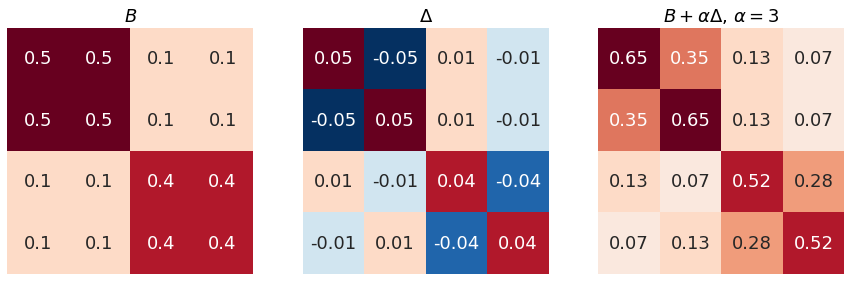

In [2]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
base_B = np.array(
    [
        [0.5, 0.5, 0.1, 0.1],
        [0.5, 0.5, 0.1, 0.1],
        [0.1, 0.1, 0.4, 0.4],
        [0.1, 0.1, 0.4, 0.4],
    ]
)

perturb_B = np.array(
    [
        [0.05, -0.05, 0.01, -0.01],
        [-0.05, 0.05, 0.01, -0.01],
        [0.01, -0.01, 0.04, -0.04],
        [-0.01, 0.01, -0.04, 0.04],
    ]
)
heatmap_kws = dict(
    cmap="RdBu_r",
    center=0,
    cbar=False,
    annot=True,
    square=True,
    xticklabels=False,
    yticklabels=False,
)
sns.heatmap(base_B, ax=axs[0], **heatmap_kws)
axs[0].set(title=r"$B$")
sns.heatmap(perturb_B, ax=axs[1], **heatmap_kws)
axs[1].set(title=r"$\Delta$")
sns.heatmap(base_B + 3 * perturb_B, ax=axs[2], **heatmap_kws)
axs[2].set(title=r"$B + \alpha \Delta$, $\alpha = 3$")

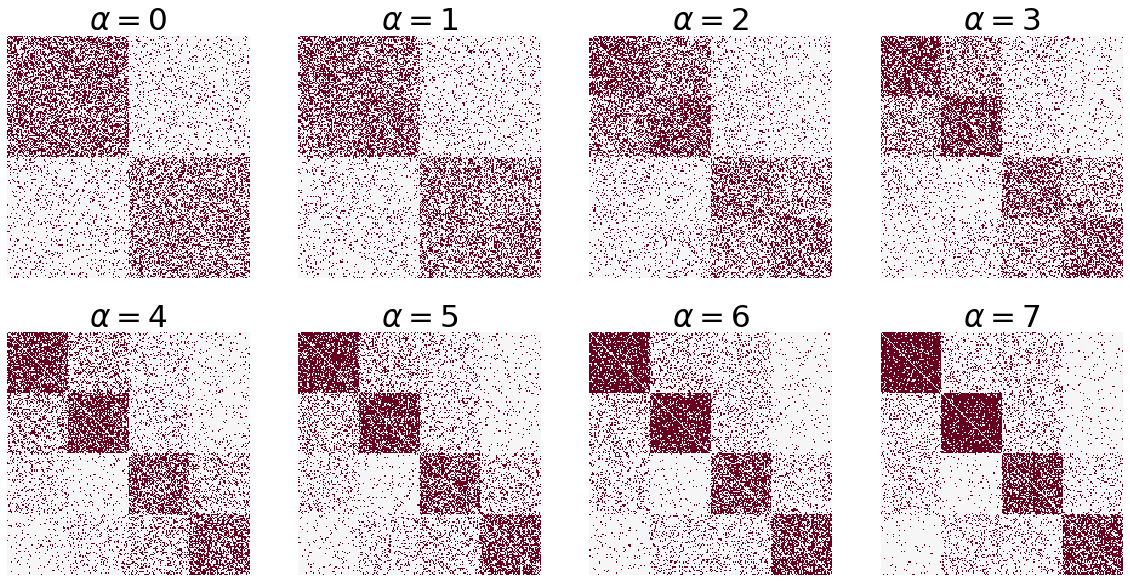

In [3]:
posit_labels = np.array(100 * [0] + 100 * [1])

n_per_comm = [50, 50, 50, 50]

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
rows = []
alphas = np.linspace(0, 7, 8)
n_trials = 300
for trial in range(n_trials):
    for i, alpha in enumerate(alphas):
        composite_B = base_B + alpha * perturb_B
        A, labels = gl.simulations.sbm(
            n_per_comm, composite_B, return_labels=True, directed=True
        )
        if trial == 0:
            ax = gl.plot.heatmap(A, cbar=False, ax=axs.flat[i])
            ax.set_title(r"$\alpha = $" + f"{int(alpha)}", fontsize="xx-large")

        sbm = gl.models.SBMEstimator(directed=True, loops=False)
        sbm.fit(A, y=posit_labels)
        log_lik = sbm.score(A)
        p_mat = sbm.p_mat_
        diff = A - p_mat
        exp = 1 - np.linalg.norm(diff) ** 2 / np.linalg.norm(A) ** 2
        rows.append(
            {
                "trial": trial,
                "alpha": alpha,
                "exp": exp,
                "log_lik": log_lik,
                "partition": "Level 1",
            }
        )

        sbm = gl.models.SBMEstimator(directed=True, loops=False)
        sbm.fit(A, y=labels)
        log_lik = sbm.score(A)
        p_mat = sbm.p_mat_
        diff = A - p_mat
        exp = 1 - np.linalg.norm(diff) ** 2 / np.linalg.norm(A) ** 2
        rows.append(
            {
                "trial": trial,
                "alpha": alpha,
                "exp": exp,
                "log_lik": log_lik,
                "partition": "Level 2",
            }
        )

results = pd.DataFrame(rows)

# A variance-explained-like metric
 $$v =  \frac{\|A - \hat{P} \|_F^2}{\|A\|_F^2} $$

 ## Pseudo-variance-explained

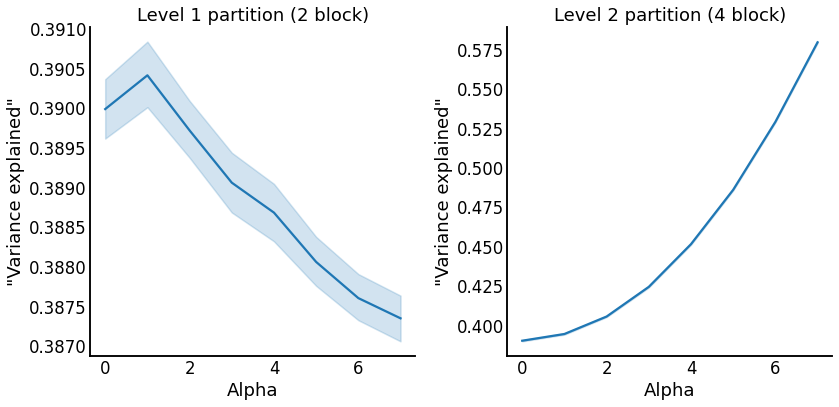

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
ax = axs[0]
sns.lineplot(
    data=results[results["partition"] == "Level 1"],
    x="alpha",
    y="exp",
    ax=ax,
)
ax.set(
    xlabel="Alpha", ylabel='"Variance explained"', title="Level 1 partition (2 block)"
)

ax = axs[1]
sns.lineplot(
    data=results[results["partition"] == "Level 2"],
    x="alpha",
    y="exp",
    ax=ax,
)
ax.set(
    xlabel="Alpha", ylabel='"Variance explained"', title="Level 2 partition (4 block)"
)
plt.tight_layout()


 ## Log-likelihood

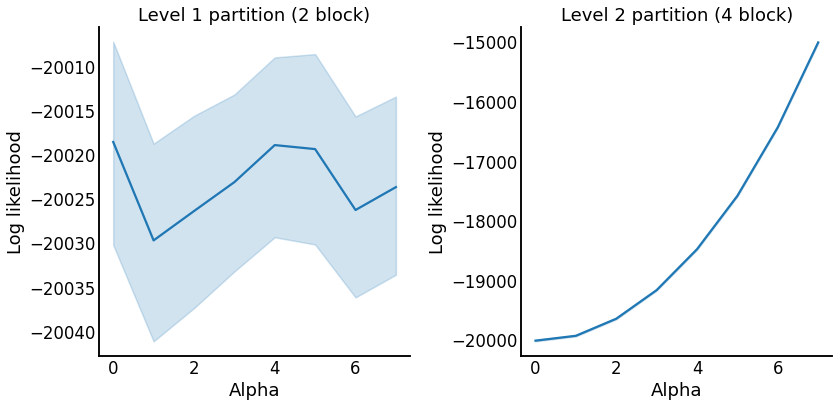

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
ax = axs[0]
sns.lineplot(
    data=results[results["partition"] == "Level 1"],
    x="alpha",
    y="log_lik",
    ax=ax,
)
ax.set(
    xlabel="Alpha", ylabel='Log likelihood', title="Level 1 partition (2 block)"
)

ax = axs[1]
sns.lineplot(
    data=results[results["partition"] == "Level 2"],
    x="alpha",
    y="log_lik",
    ax=ax,
)
ax.set(
    xlabel="Alpha", ylabel='Log likelihood', title="Level 2 partition (4 block)"
)
plt.tight_layout()
